In [1]:
from itertools import pairwise
import pandas as pd


import numpy as np


from sklearn import preprocessing


import seaborn as sns


import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import *


from sklearn.model_selection import *


from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif


from sklearn.ensemble import *


from sklearn.linear_model import *


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
print('Jobs:\n', df['job'].unique())  # unknown
print('Marital:\n', df['marital'].unique())
print('Education:\n', df['education'].unique())  # unknown
print('Default:\n', df['default'].unique())
print('Housing:\n', df['housing'].unique())
print('Loan:\n', df['loan'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


In [9]:
print('Contact:\n', df['contact'].unique())
print('Month:\n', df['month'].unique())
print('Previous Outcome:\n', df['poutcome'].unique())

Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Previous Outcome:
 ['unknown' 'failure' 'other' 'success']


In [10]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


<Axes: xlabel='y', ylabel='count'>

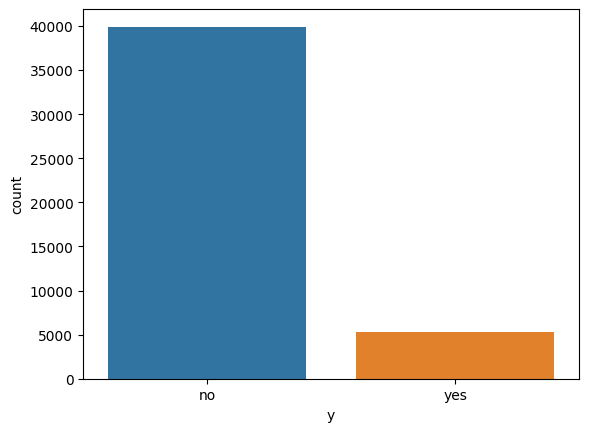

In [11]:
fig, ax = plt.subplots()
sns.countplot(x='y', data=df)

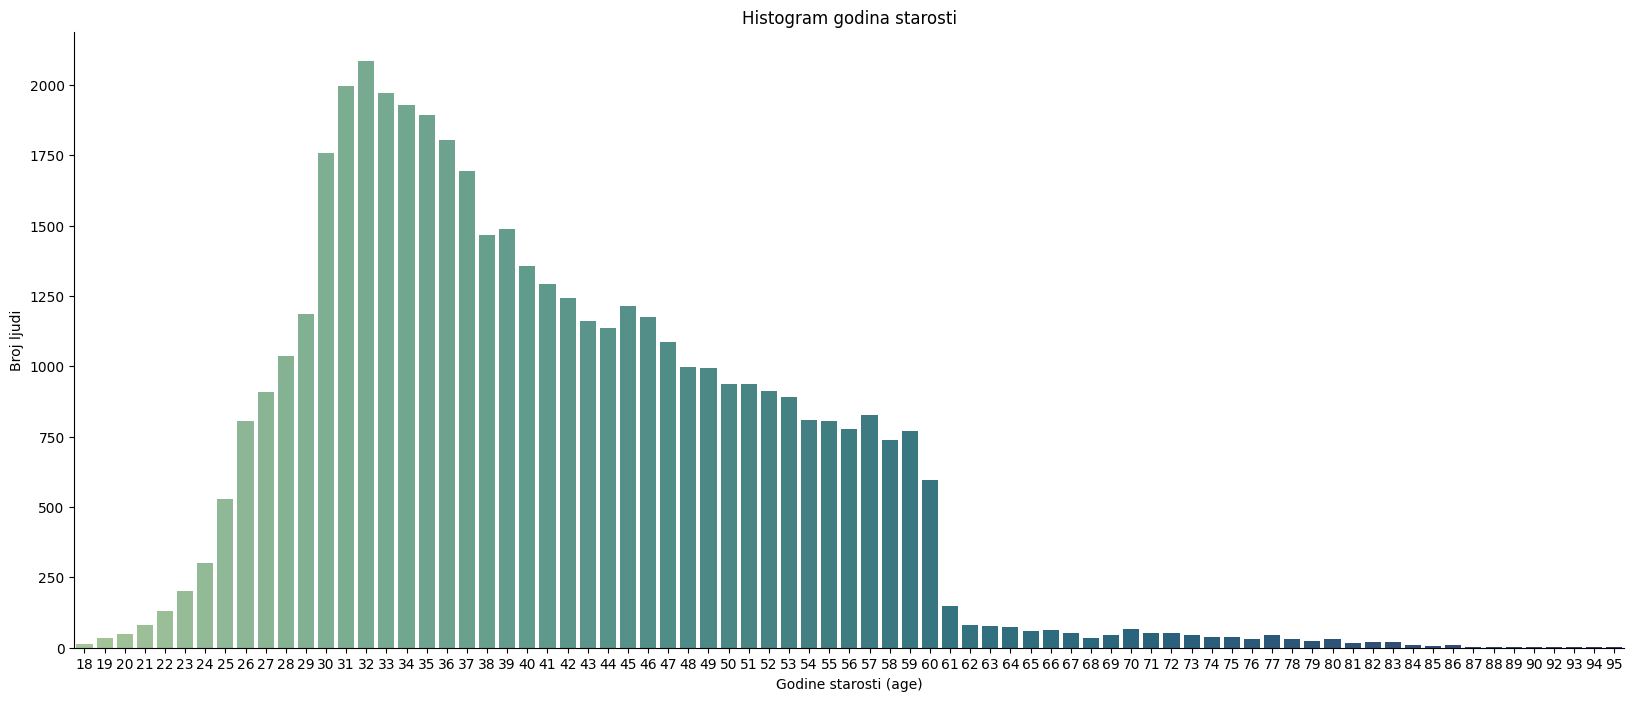

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

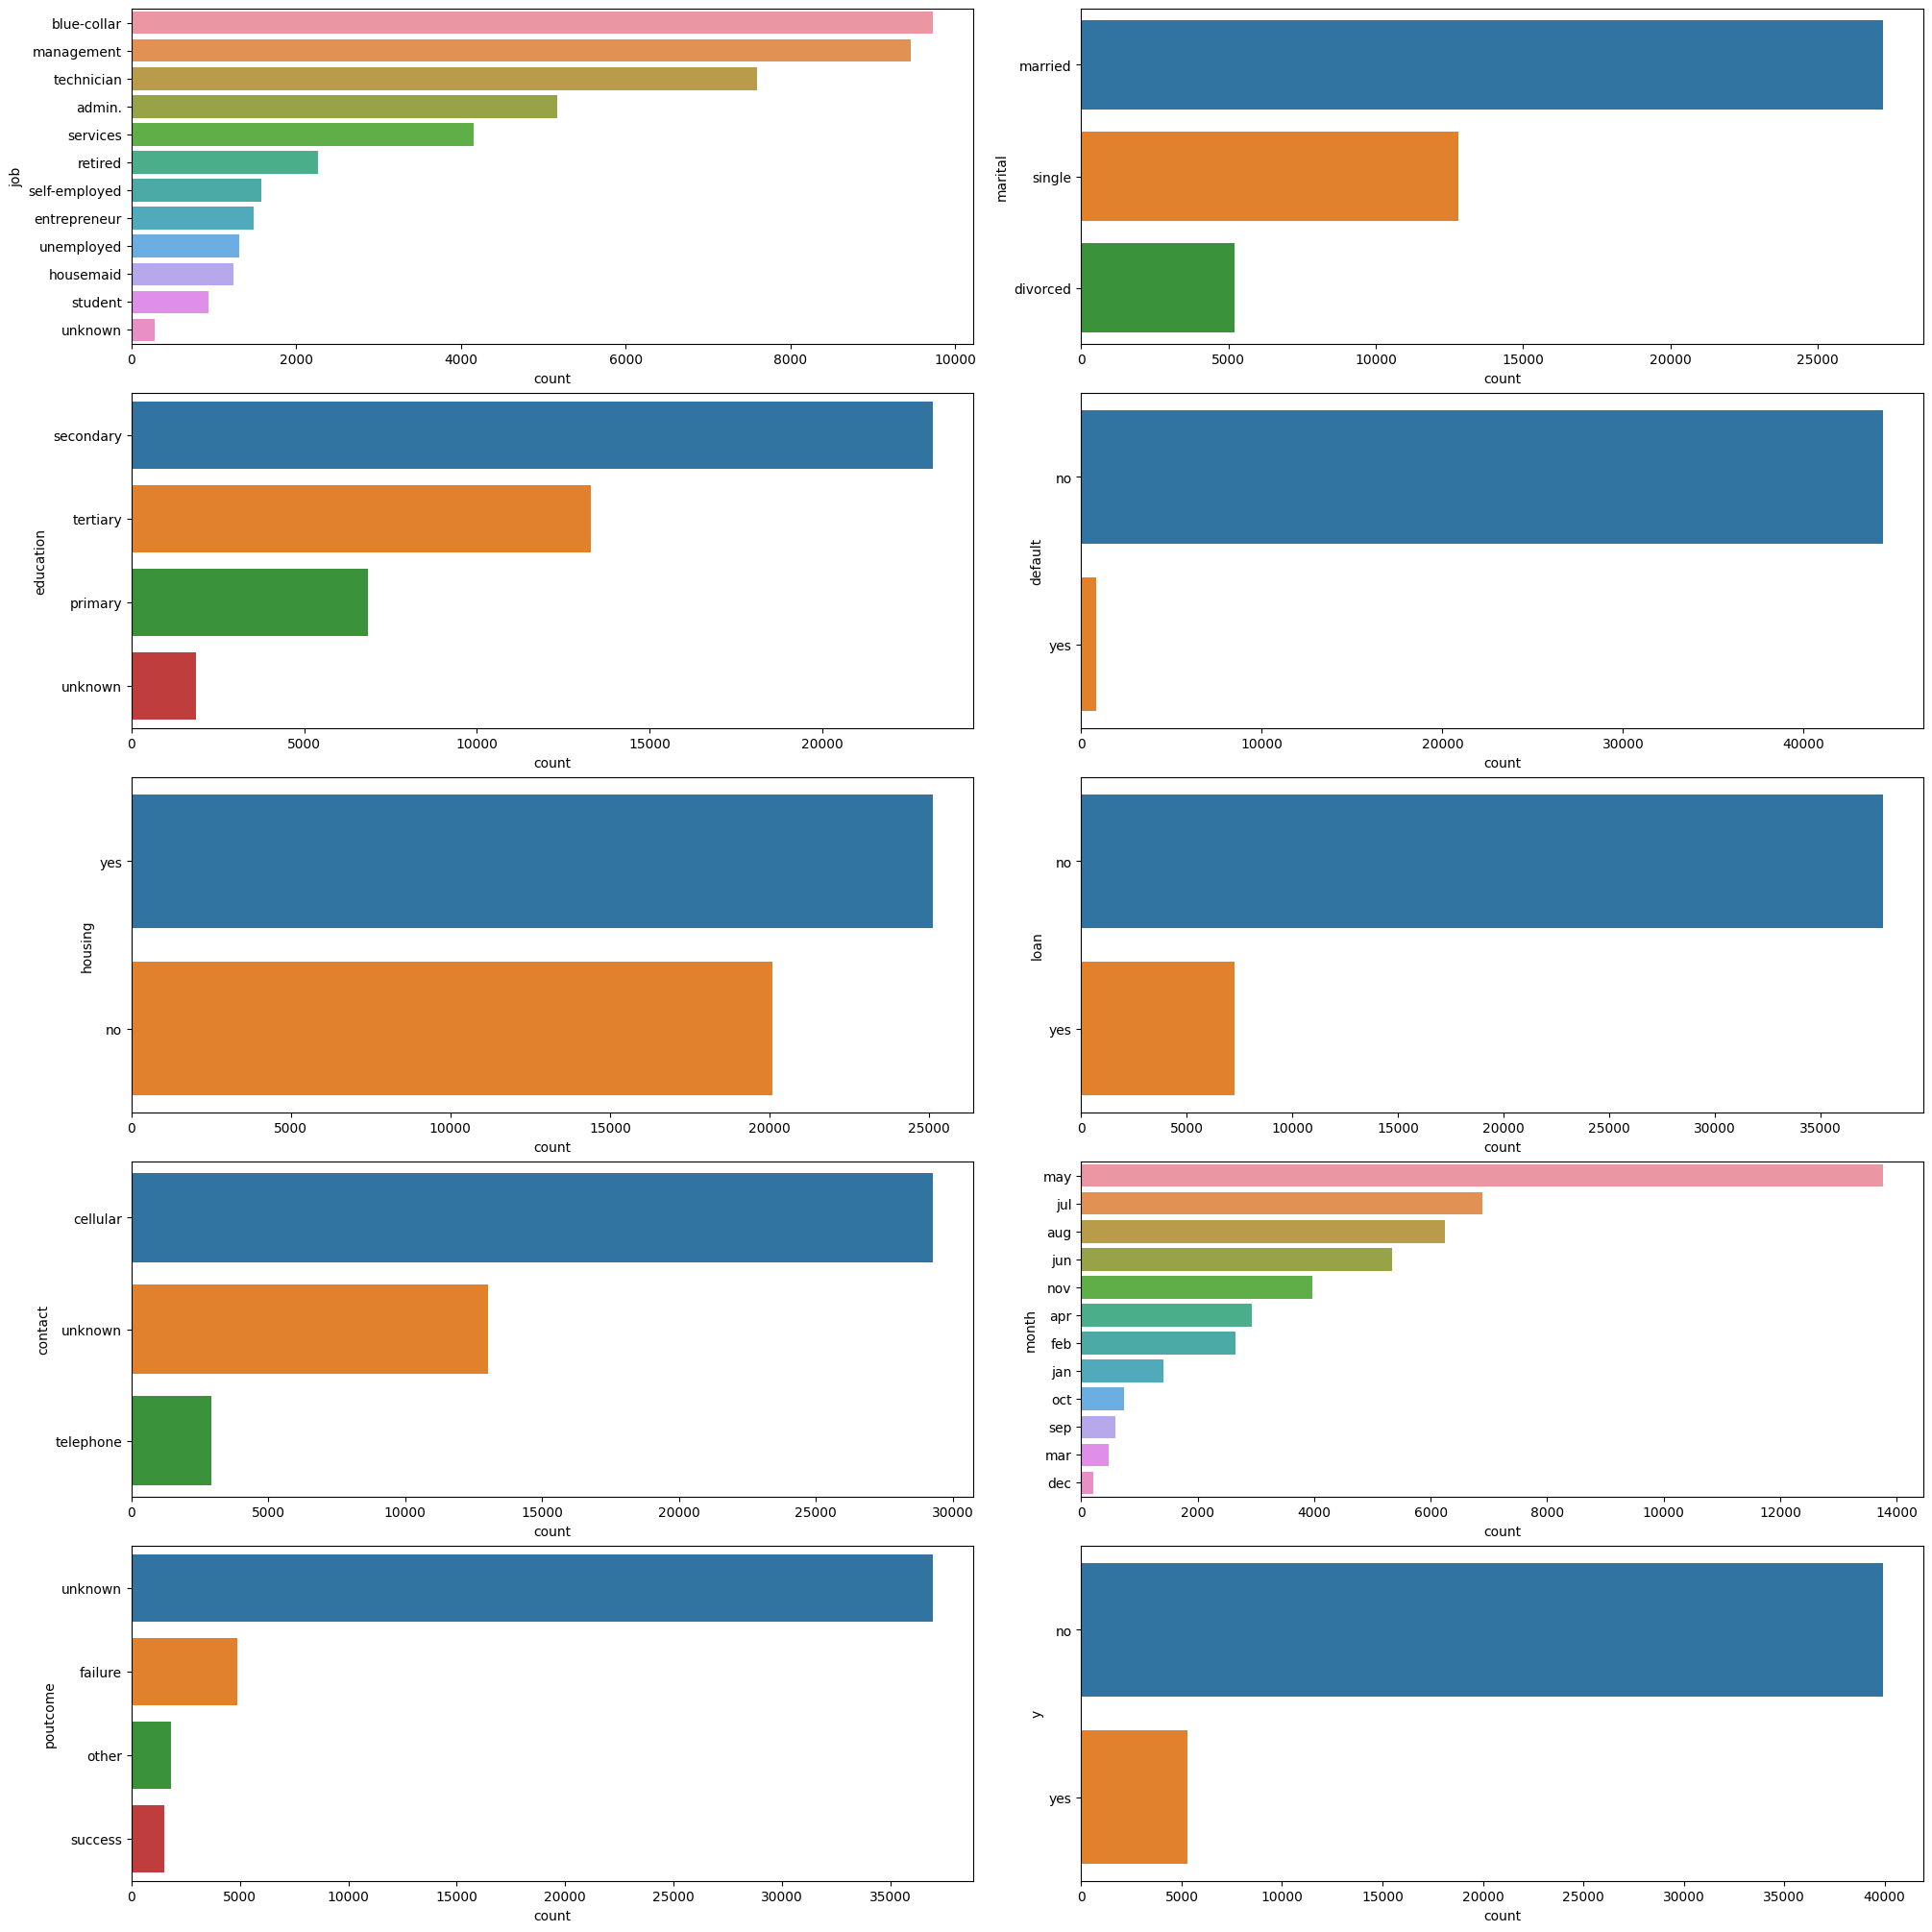

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index)

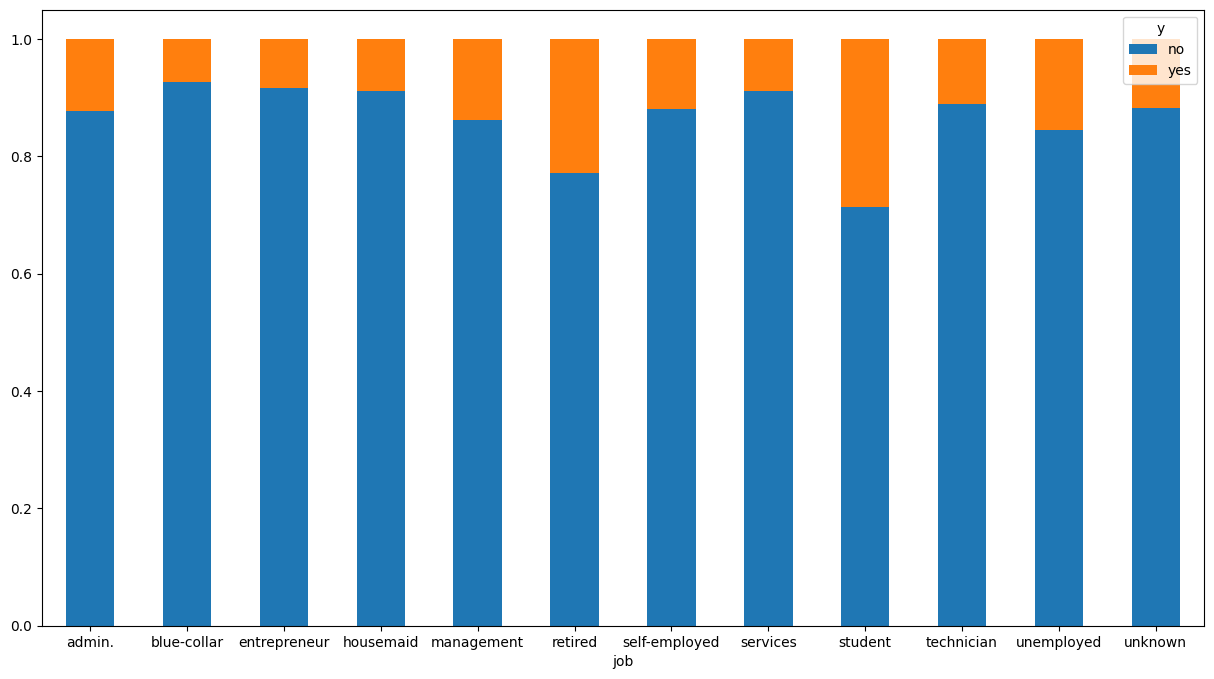

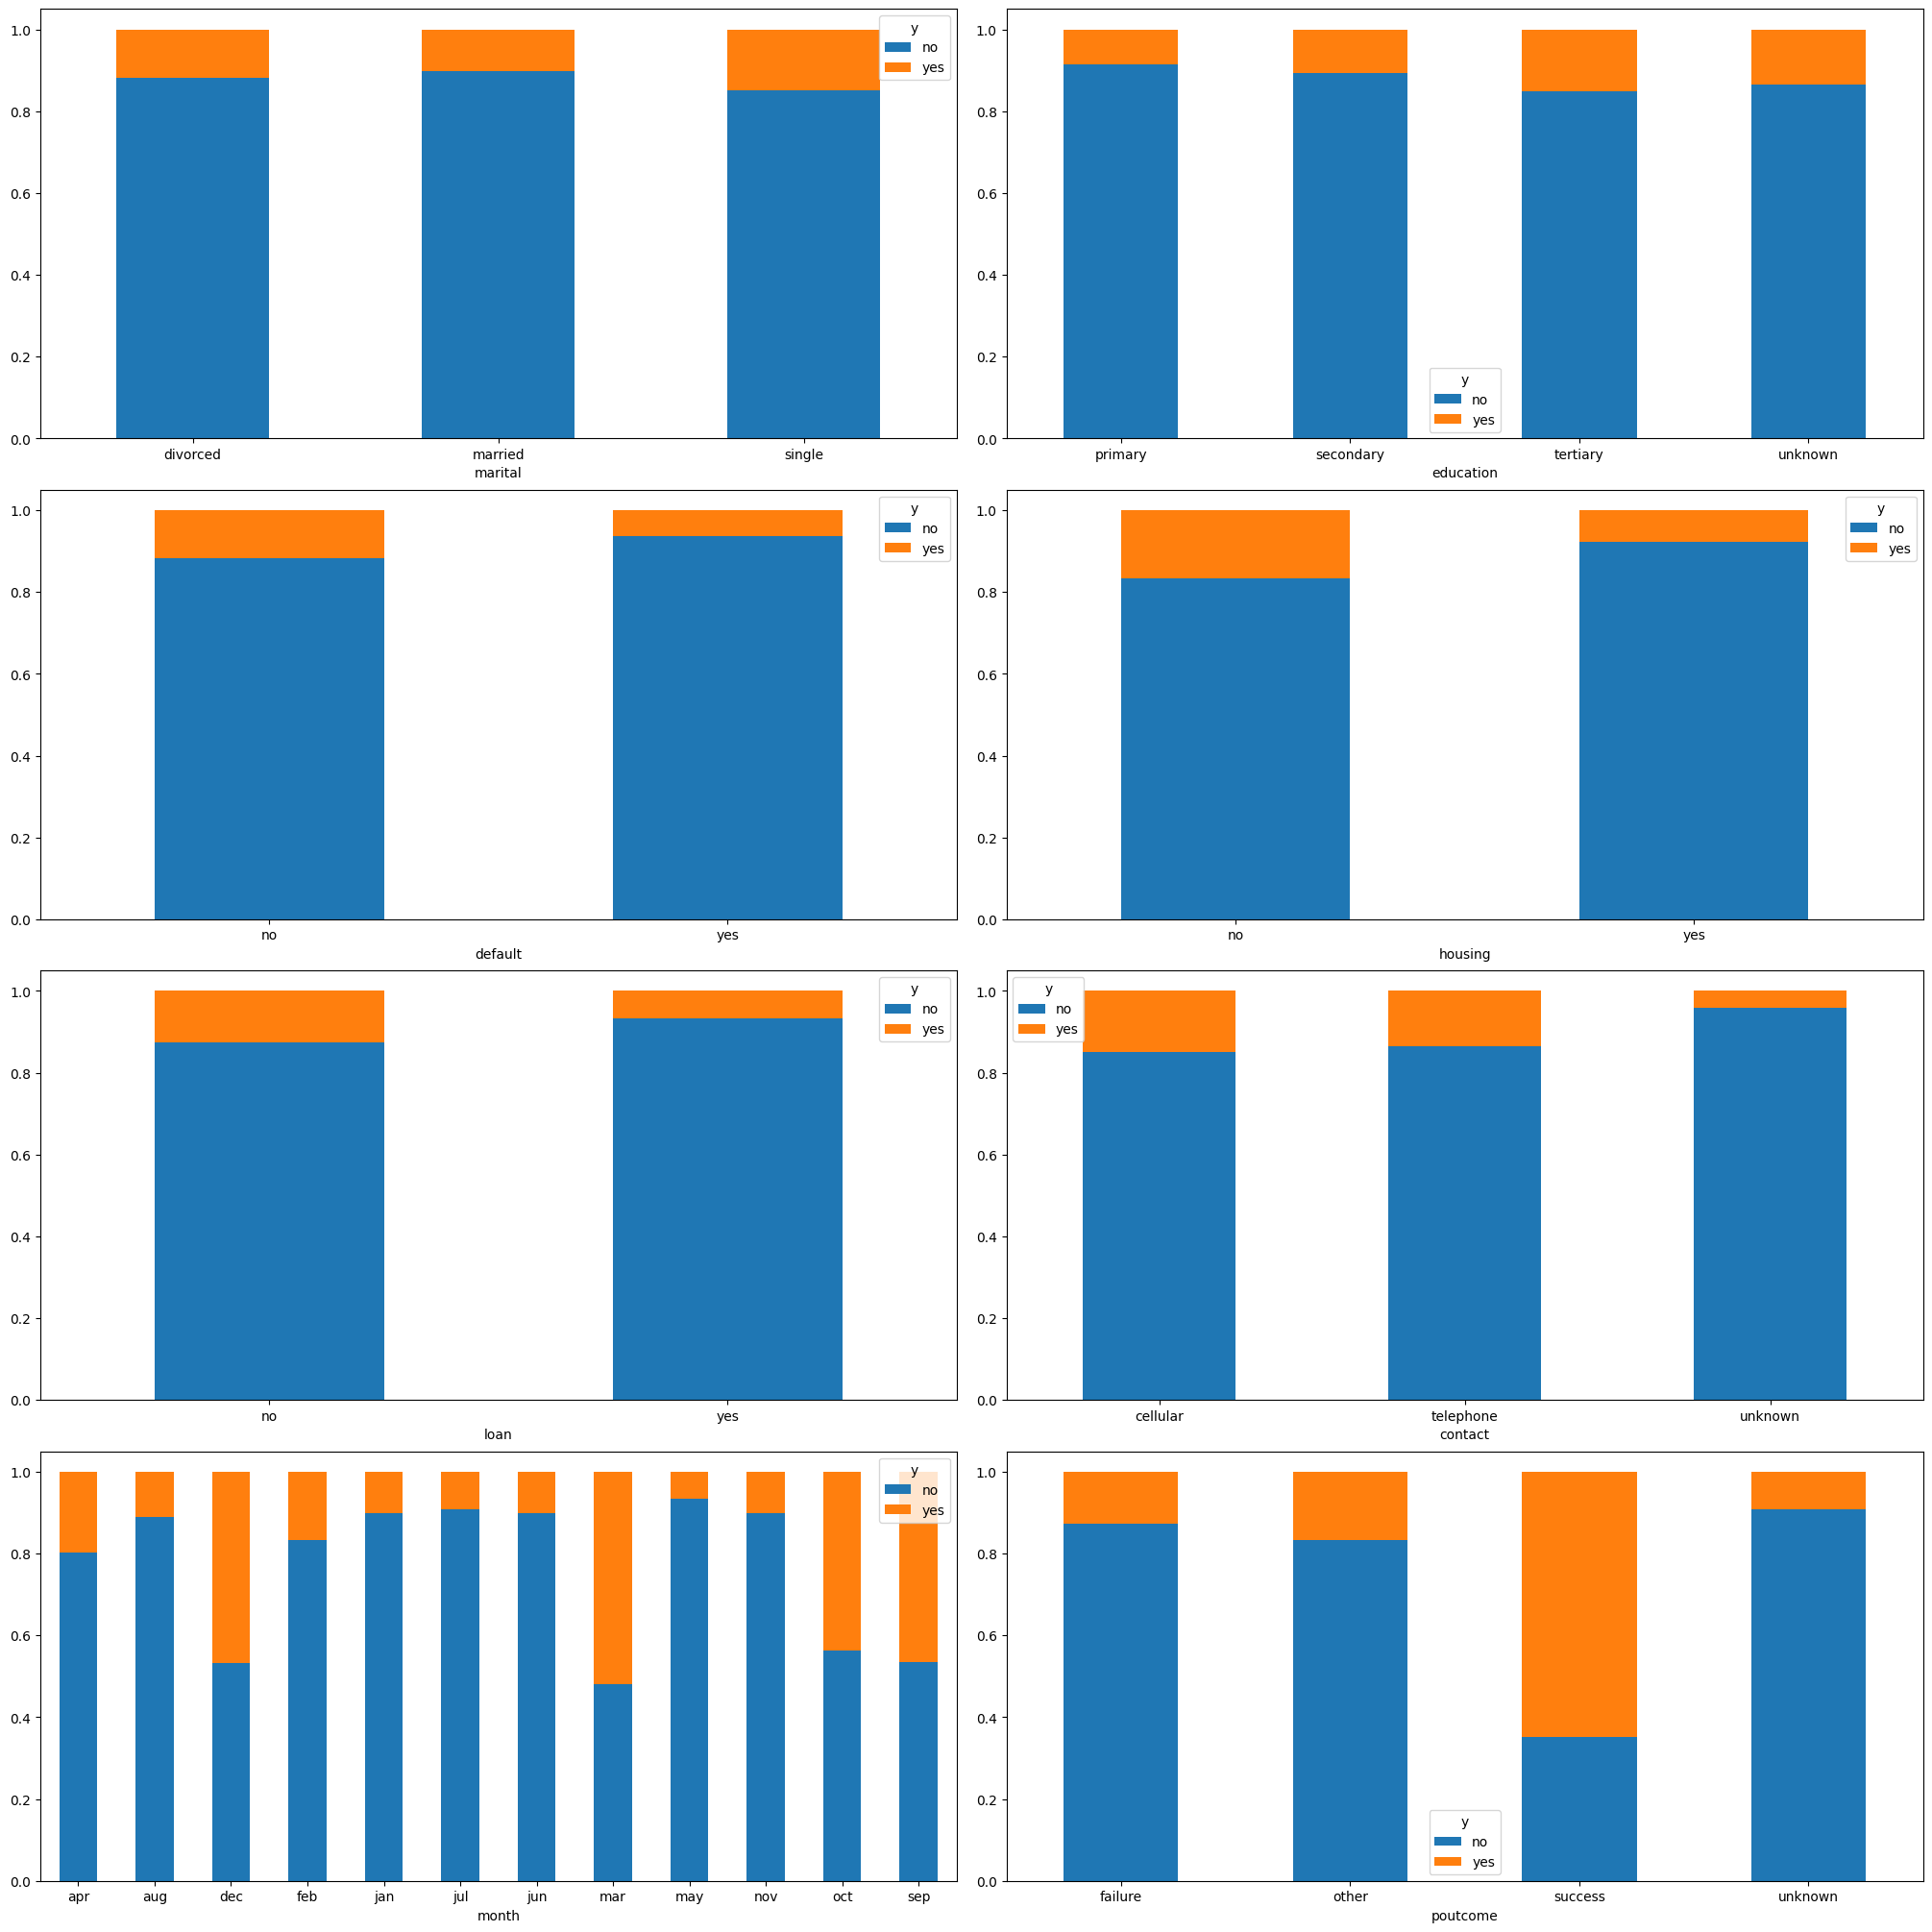

In [14]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8))
plt.show()
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0)
plt.show()

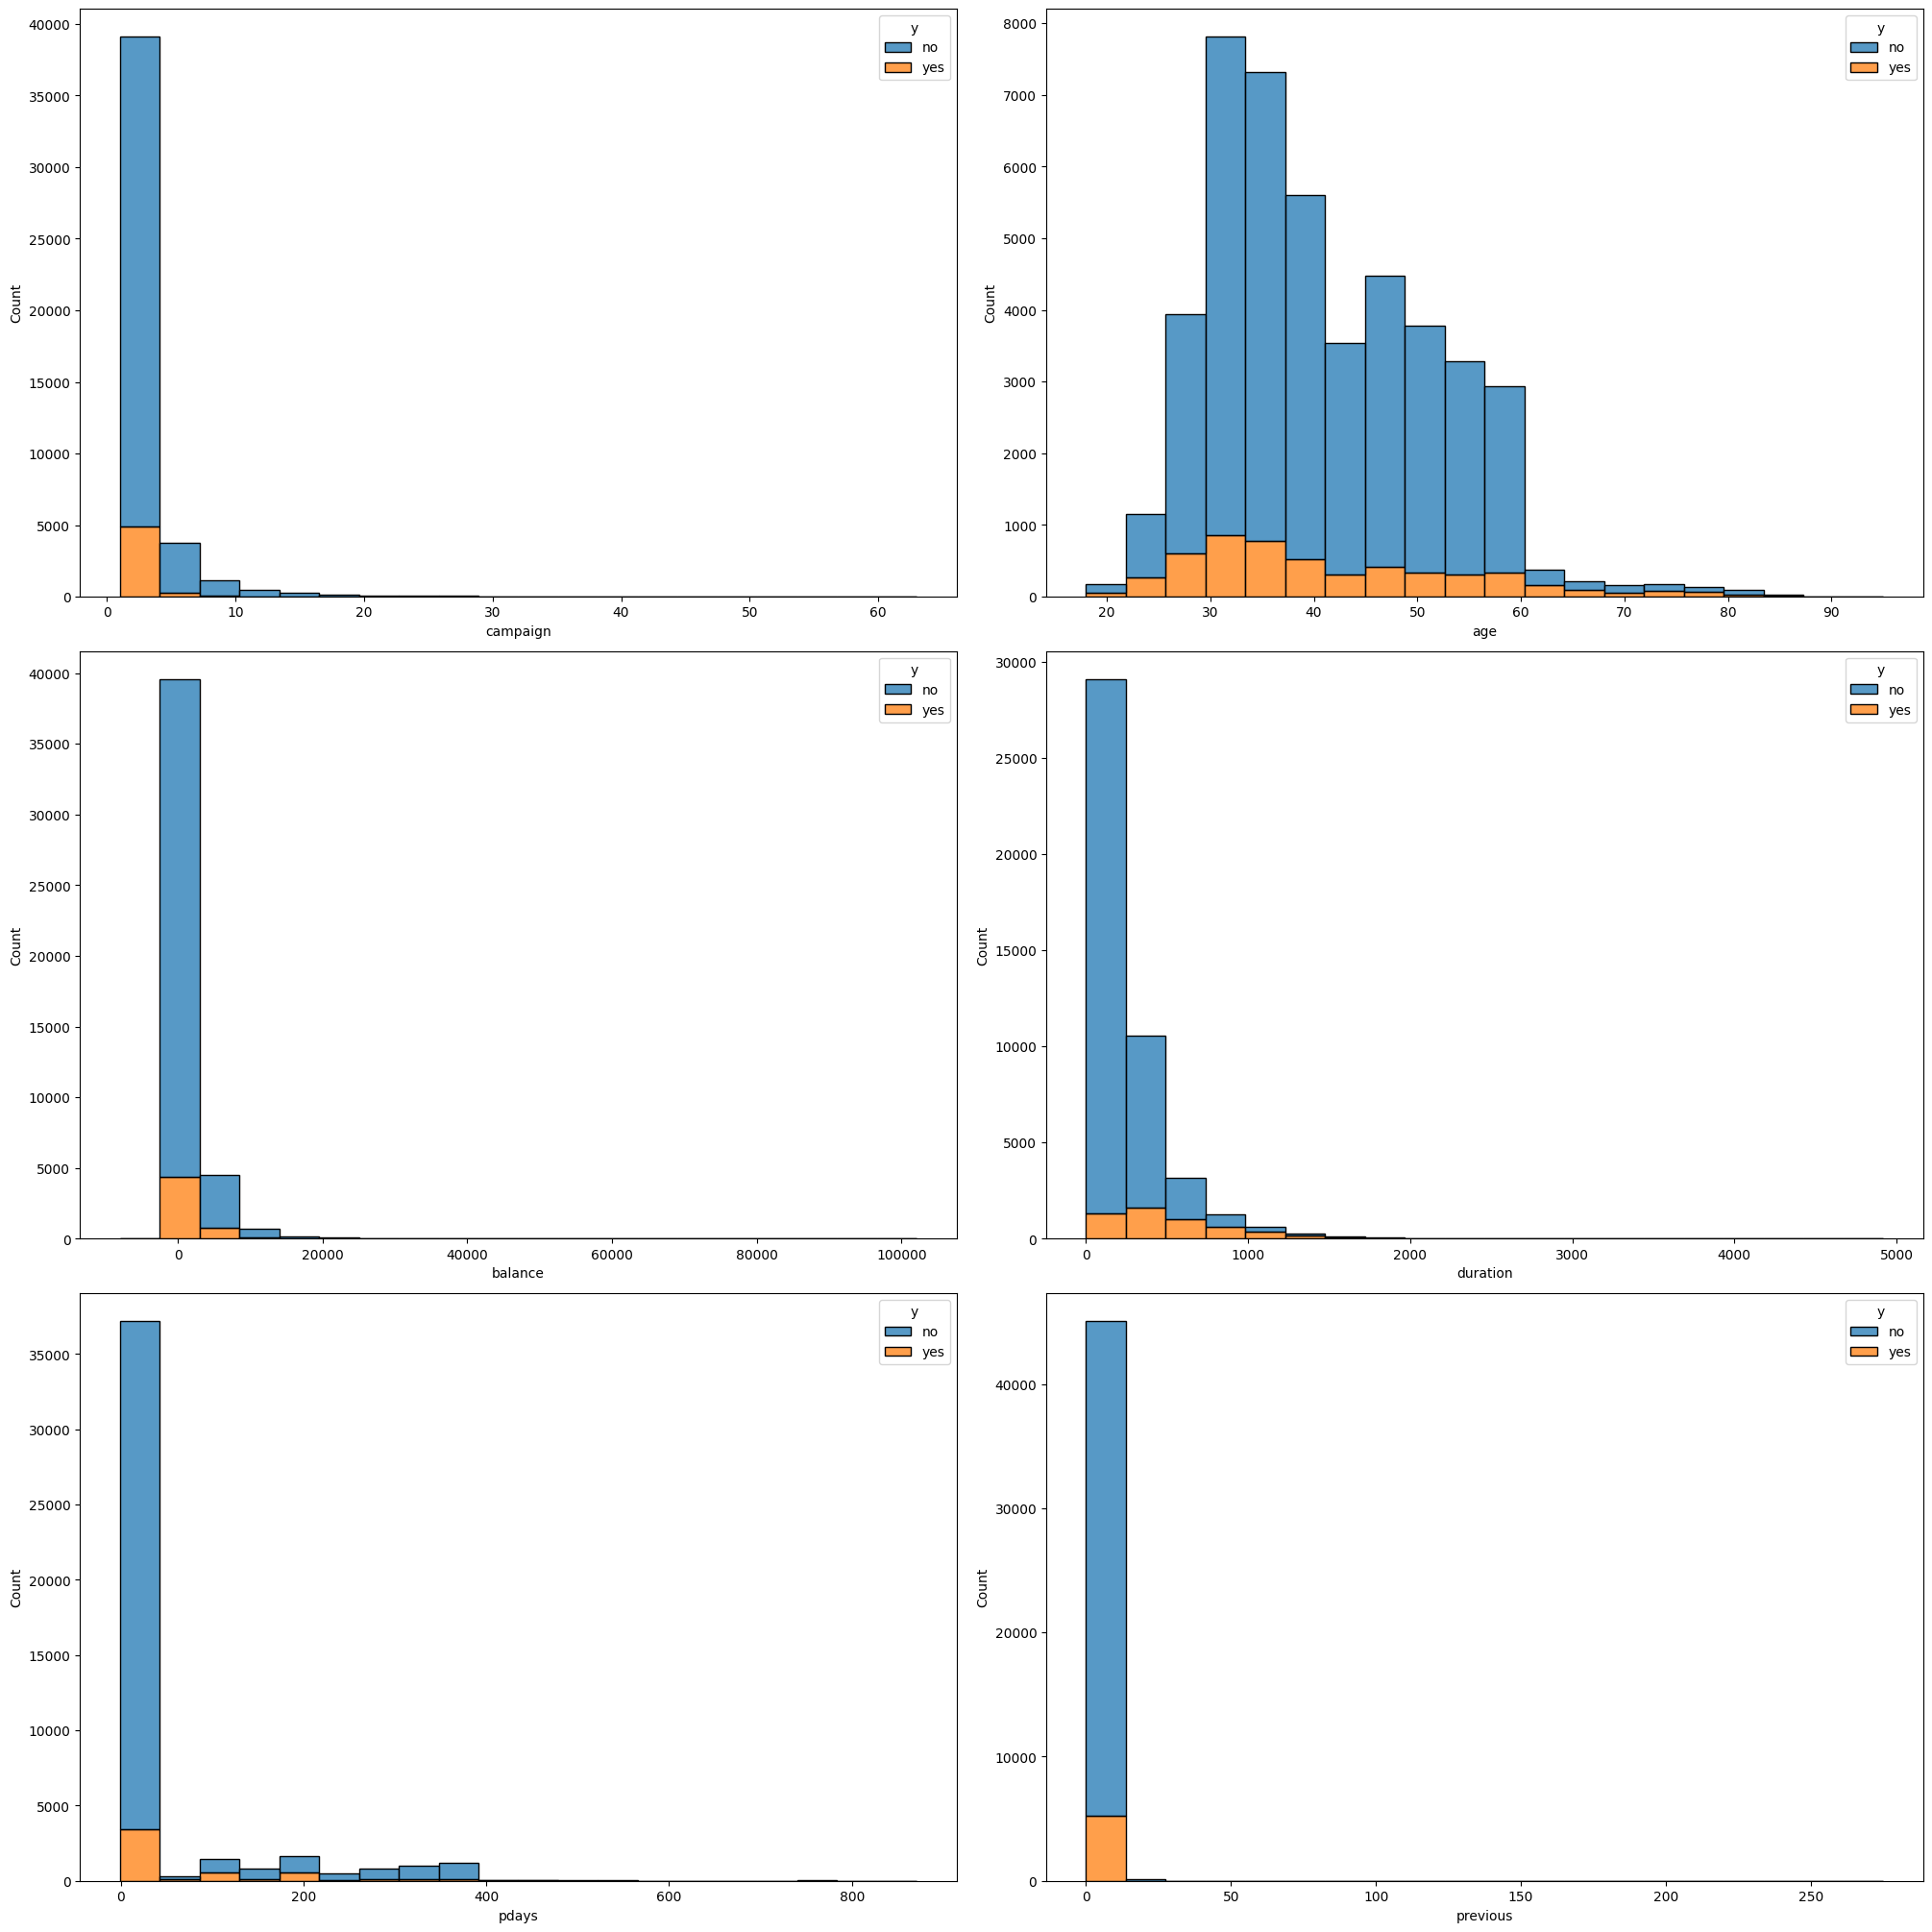

In [15]:
numerical = ['campaign', 'age', 'balance', 'duration', 'pdays', 'previous']
fig, axs = plt.subplots(3, 2, figsize=(20, 20), constrained_layout=True)


for i, f in enumerate(numerical):

    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i//2][i % 2], bins=20)


plt.show()

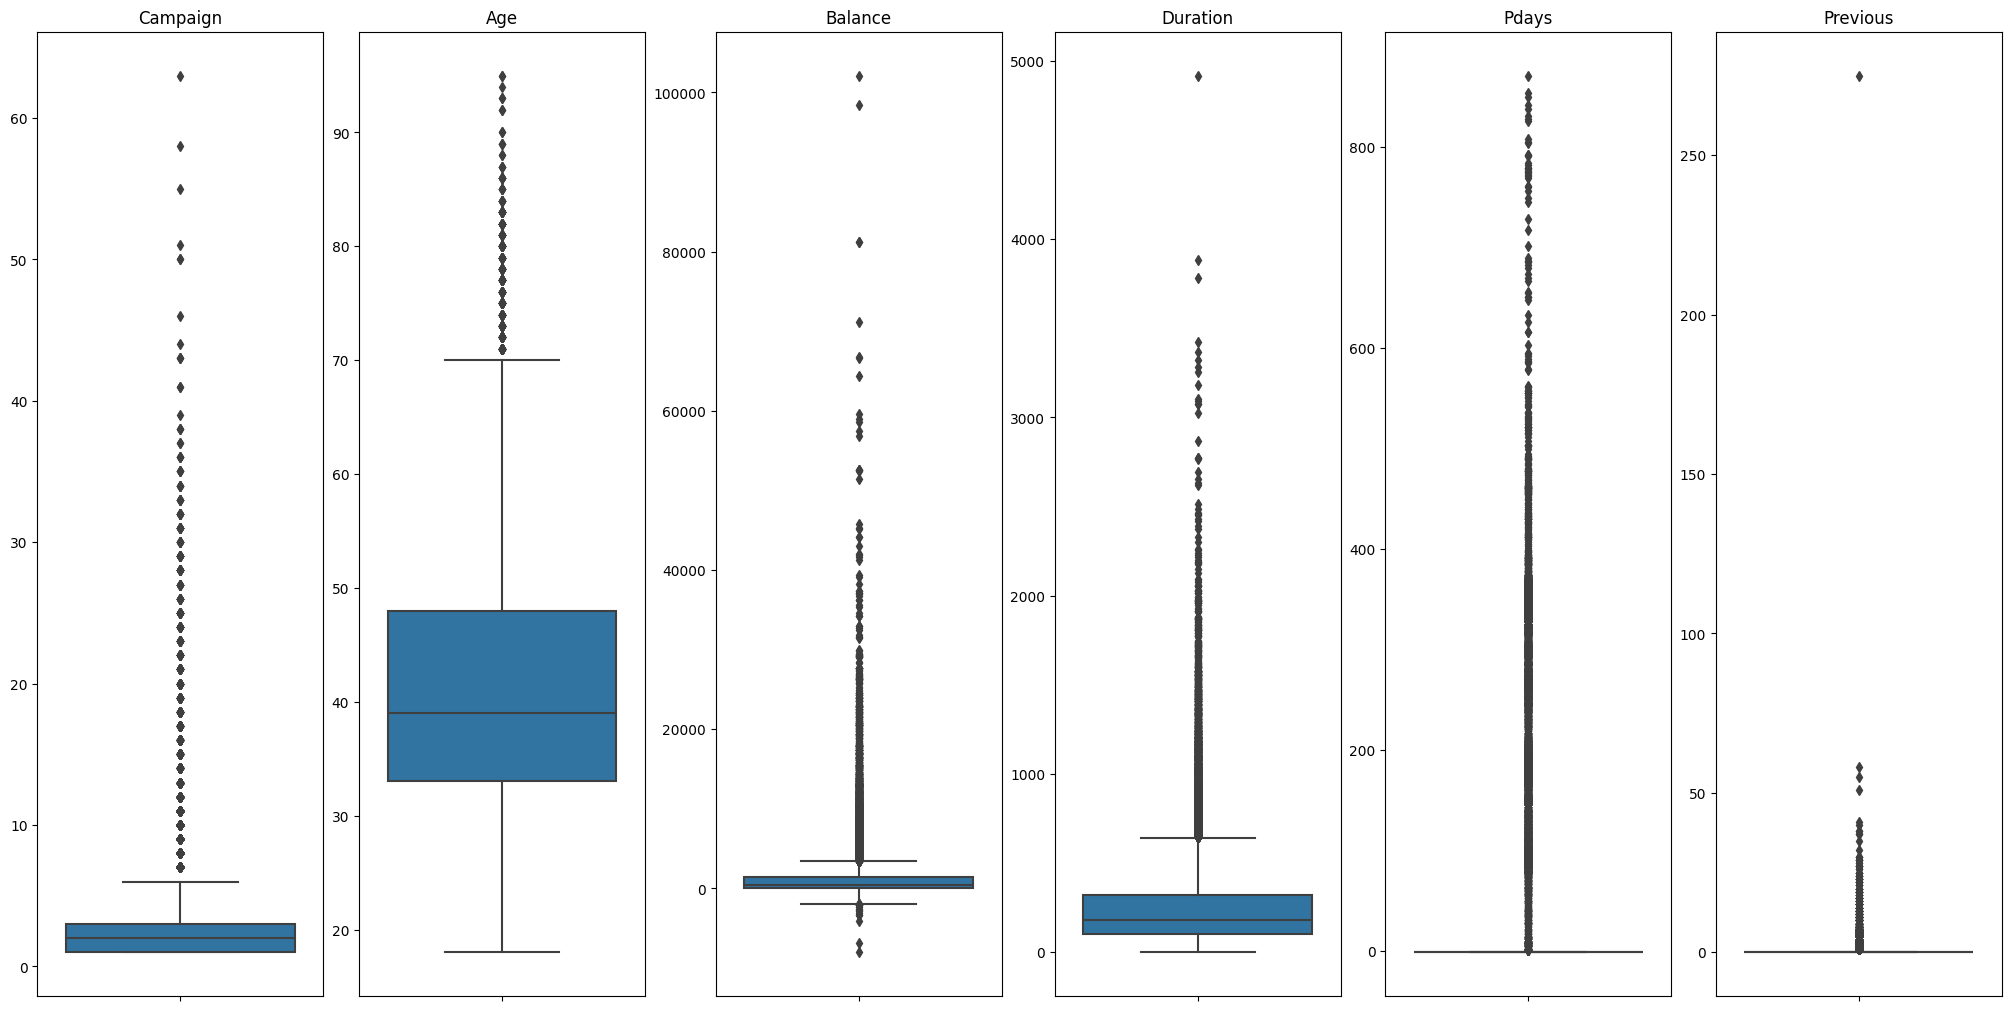

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(20, 10), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.boxplot(y=f, data=df, ax=axs[i])
    axs[i].set_title(f.capitalize())
    axs[i].set_ylabel('')

plt.show()

## Preprocesiranje


In [17]:
# remove poutcome columns
# df = df.drop(columns=['poutcome'])

In [18]:
labels = ['housing', 'default', 'loan', 'y']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [19]:
# print(df[df['campaign'] > 20].shape)
# print(df[df['balance'] > 15000].shape)
# print(df[df['duration'] > 2500].shape)
# print(df[df['pdays'] > 550].shape)
# print(df[df['previous'] > 20].shape)

# df[(df['campaign'] > 20) | (df['balance'] > 15000) |
#     (df['duration'] > 2500) | (df['pdays'] > 550) | (df['previous'] > 20)].shape

In [20]:
# drop outliers - probaj razlicito
# df = df[df['campaign'] < 20]
# df = df[df['balance'] < 15000]
# df = df[df['duration'] < 2500]
# df = df[df['pdays'] < 550]
# df = df[df['previous'] < 20]

# probaj da izbacis poutcome

In [21]:
def remove_outliers_iqr(df, column_name, multiplier=1.5) -> pd.DataFrame:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column_name] >= lower_bound) &
              (df[column_name] <= upper_bound)]


def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [22]:
for column in ['campaign', 'balance', 'duration']:
    log_transform(df, column)

In [23]:
# change pdays and previous to binary
df['pdays'] = df['pdays'].apply(lambda x: 0 if x < 0 else 1)
df['previous'] = df['previous'].apply(lambda x: 0 if x < 0.5 else 1)

In [24]:
# numerical.remove('pdays')
# numerical.remove('previous')
# old_df = df.copy()
print(f"Pre izbacivanja: {df.shape}")
for col in ['campaign', 'balance', 'duration', 'age']:
    df = remove_outliers_iqr(df, col, multiplier=1.5)  # nije fiksno, isprobati
# df = remove_outliers_iqr(df, 'age')
print(f"Posle izbacivanja: {df.shape}")
# df = old_df

Pre izbacivanja: (45211, 17)
Posle izbacivanja: (39312, 17)


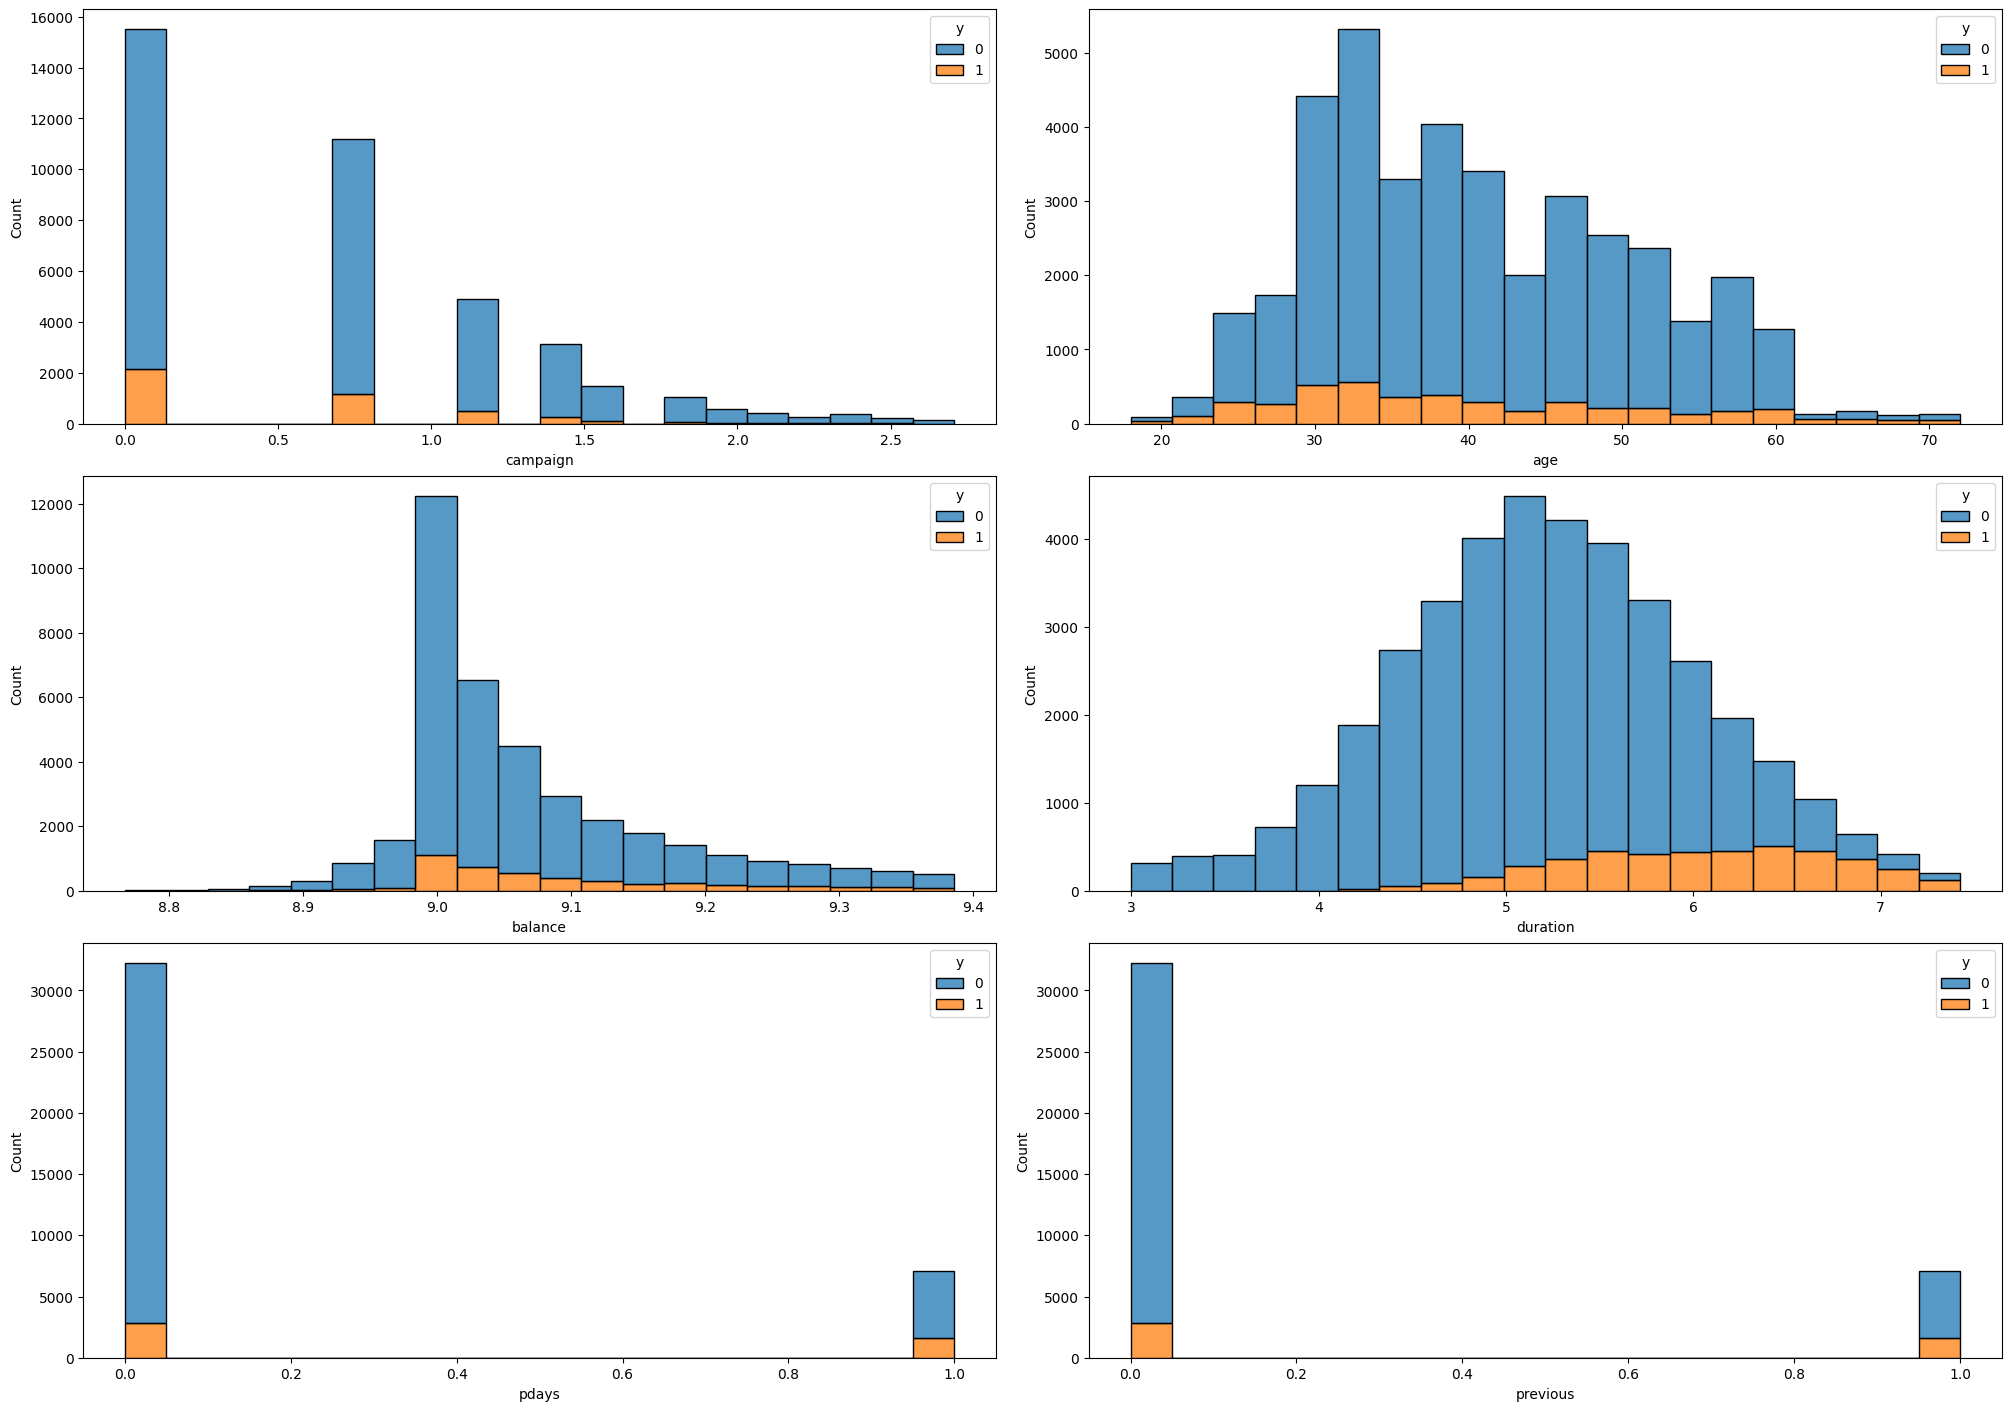

In [25]:
fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 14), constrained_layout=True)


for i, f in enumerate(numerical):

    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i//2][i % 2], bins=20)


plt.show()

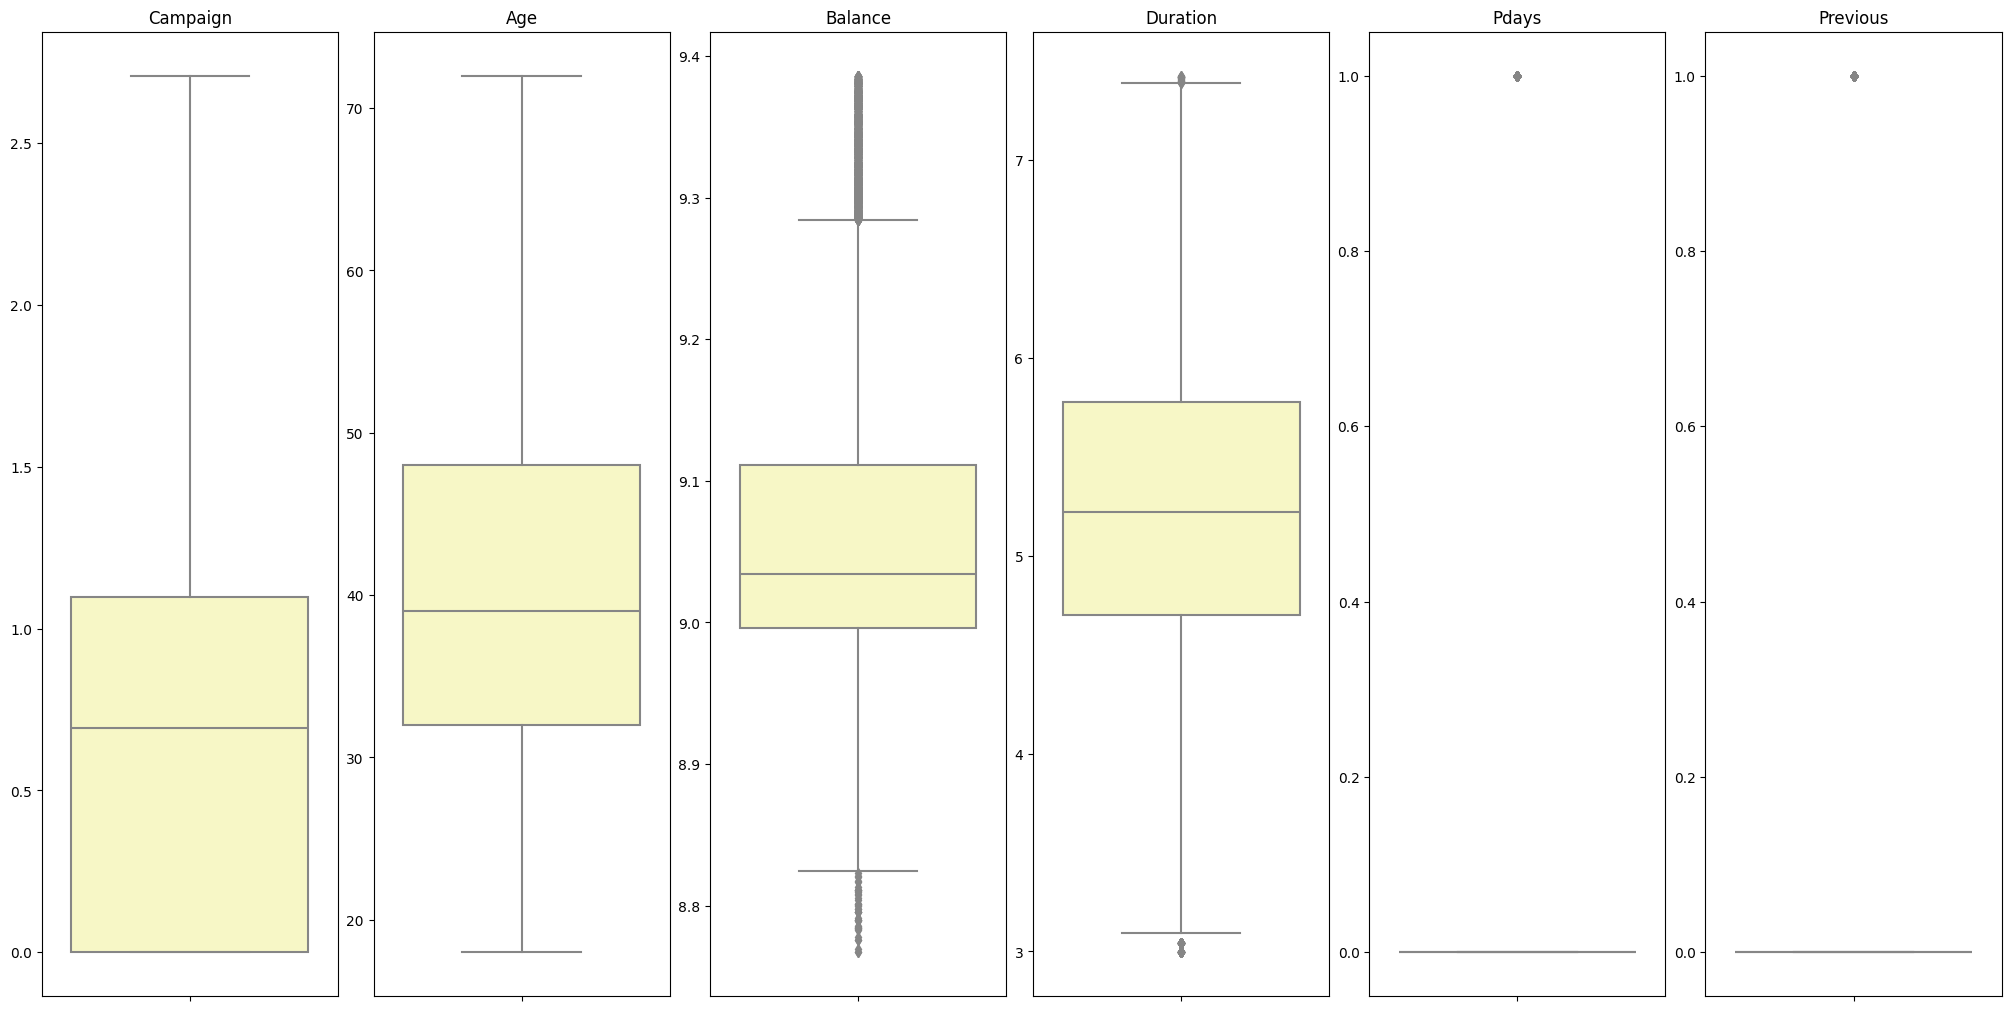

In [26]:
fig, axs = plt.subplots(1, len(numerical), figsize=(
    20, 10), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.boxplot(y=f, data=df, ax=axs[i], palette='Spectral')
    axs[i].set_title(f.capitalize())
    axs[i].set_ylabel('')

plt.show()

In [27]:
# df.loc[df['age'] <= 30, 'age'] = 1  # probaj i bez ovoga
# df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age'] = 2
# df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age'] = 3
# df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age'] = 4
# df.loc[(df['age'] > 60) & (df['age'] <= 70), 'age'] = 5
# df.loc[df['age'] > 70, 'age'] = 6
# df.head()

In [28]:
# pametniji nacin za age
kbins_discretizer = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='quantile')
df['age'] = kbins_discretizer.fit_transform(df[['age']])
age_bins = list(pairwise(kbins_discretizer.bin_edges_[0].tolist()))
print(age_bins)  # use for labeling later
df.head()

[(18.0, 31.0), (31.0, 36.0), (36.0, 42.0), (42.0, 50.0), (50.0, 72.0)]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,4.0,management,married,tertiary,0,9.226509,1,0,unknown,5,may,5.568345,0.0,0,0,unknown,0
1,3.0,technician,single,secondary,0,8.993303,1,0,unknown,5,may,5.023881,0.0,0,0,unknown,0
2,1.0,entrepreneur,married,secondary,0,8.989943,1,1,unknown,5,may,4.343805,0.0,0,0,unknown,0
3,3.0,blue-collar,married,unknown,0,9.161780,1,0,unknown,5,may,4.532599,0.0,0,0,unknown,0
4,1.0,unknown,single,unknown,0,8.989818,0,0,unknown,5,may,5.293305,0.0,0,0,unknown,0


<Axes: >

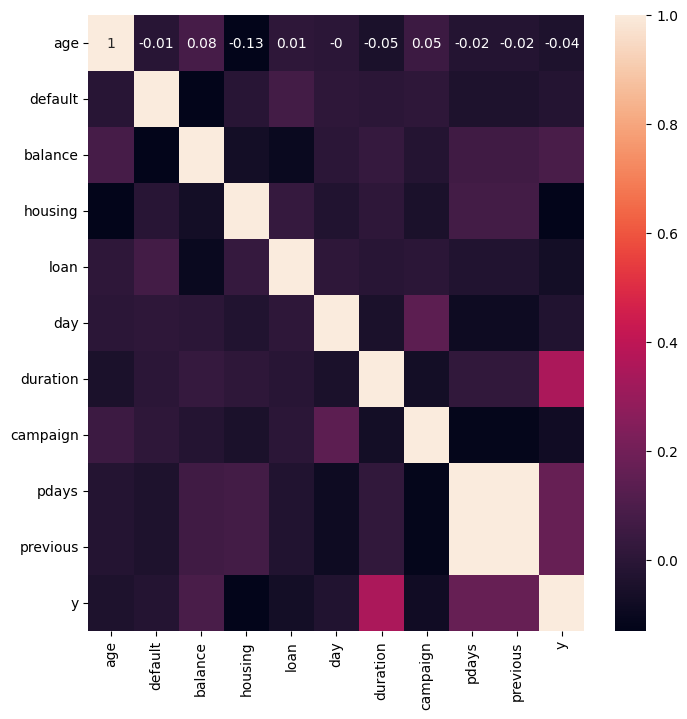

In [29]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=True, ax=ax)

In [30]:
one_hot_cols = ['job', 'contact', 'marital',
                'education', 'month', 'poutcome', 'age']  # probaj i age bez one hot
df = pd.get_dummies(data=df, columns=one_hot_cols).astype('uint8')
df.head()

,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
0,0,9,1,0,5,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,8,1,0,5,5,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,8,1,1,5,4,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,9,1,0,5,4,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,8,0,0,5,5,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [31]:
df.describe()

,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
count,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.00000,39312.000000,39312.000000,39312.000000,...,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000
mean,0.019307,8.715558,0.566341,0.169007,15.677834,4.736594,0.35727,0.179970,0.179970,0.112815,...,0.010913,0.108745,0.039072,0.032026,0.820157,0.161045,0.223265,0.202254,0.200600,0.212836
std,0.137604,0.451154,0.495586,0.374763,8.343657,0.850826,0.55036,0.384168,0.384168,0.316371,...,0.103894,0.311323,0.193769,0.176071,0.384062,0.367577,0.416440,0.401686,0.400455,0.409318
min,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,8.000000,4.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,1.000000,0.000000,16.000000,5.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,9.000000,1.000000,0.000000,21.000000,5.000000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,9.000000,1.000000,1.000000,31.000000,7.000000,2.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.dtypes

default                uint8
balance                uint8
housing                uint8
loan                   uint8
day                    uint8
duration               uint8
campaign               uint8
pdays                  uint8
previous               uint8
y                      uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
month_apr              uint8
month_aug              uint8
month_dec     

In [33]:
# probaj i norm i std
scaler = StandardScaler()
cols_to_scale = ['balance', 'duration', 'pdays',
                 'previous', 'day', 'campaign']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
0,0,0.630485,1,0,-1.279771,0.309592,-0.649165,-0.468474,-0.468474,0,...,0,0,0,0,1,0,0,0,0,1
1,0,-1.586080,1,0,-1.279771,0.309592,-0.649165,-0.468474,-0.468474,0,...,0,0,0,0,1,0,0,0,1,0
2,0,-1.586080,1,1,-1.279771,-0.865751,-0.649165,-0.468474,-0.468474,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0.630485,1,0,-1.279771,-0.865751,-0.649165,-0.468474,-0.468474,0,...,0,0,0,0,1,0,0,0,1,0
4,0,-1.586080,0,0,-1.279771,0.309592,-0.649165,-0.468474,-0.468474,0,...,0,0,0,0,1,0,1,0,0,0


In [34]:
df.describe()

,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
count,39312.000000,3.931200e+04,39312.000000,39312.000000,3.931200e+04,3.931200e+04,3.931200e+04,3.931200e+04,3.931200e+04,39312.000000,...,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000,39312.000000
mean,0.019307,-6.824912e-16,0.566341,0.169007,-5.494632e-17,3.759485e-16,3.470294e-17,-2.313529e-17,-2.313529e-17,0.112815,...,0.010913,0.108745,0.039072,0.032026,0.820157,0.161045,0.223265,0.202254,0.200600,0.212836
std,0.137604,1.000013e+00,0.495586,0.374763,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.316371,...,0.103894,0.311323,0.193769,0.176071,0.384062,0.367577,0.416440,0.401686,0.400455,0.409318
min,0.000000,-1.586080e+00,0.000000,0.000000,-1.759183e+00,-3.216438e+00,-6.491655e-01,-4.684745e-01,-4.684745e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.586080e+00,0.000000,0.000000,-9.202118e-01,-8.657512e-01,-6.491655e-01,-4.684745e-01,-4.684745e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.304852e-01,1.000000,0.000000,3.861261e-02,3.095919e-01,-6.491655e-01,-4.684745e-01,-4.684745e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,6.304852e-01,1.000000,0.000000,6.378778e-01,3.095919e-01,1.167851e+00,-4.684745e-01,-4.684745e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6.304852e-01,1.000000,1.000000,1.836408e+00,2.660278e+00,2.984867e+00,2.134588e+00,2.134588e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

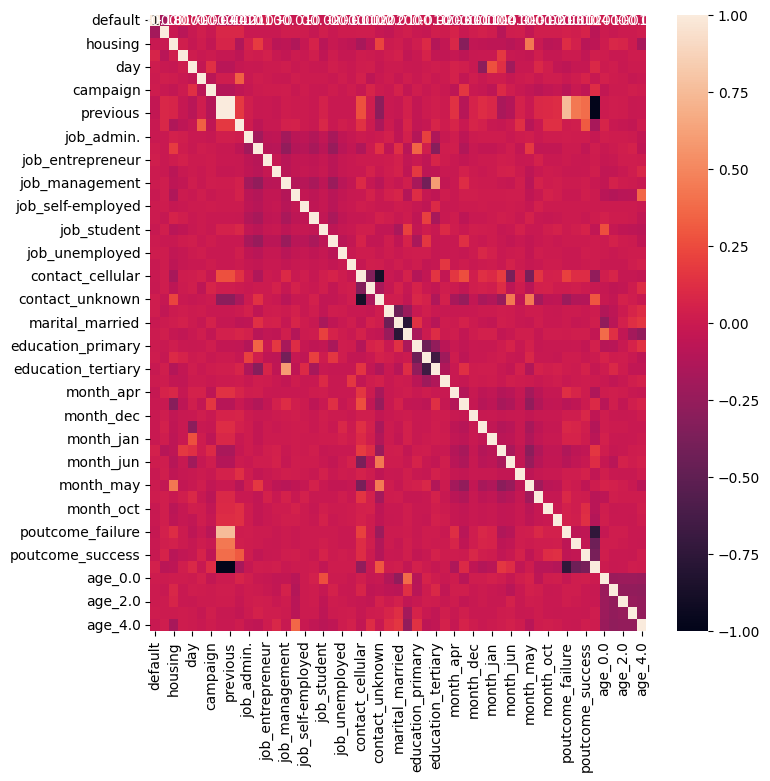

In [35]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=True, ax=ax)

## Isprobavanje modela


In [36]:
# Train test split
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm", "F1", "AUC", "Accuracy"])

In [40]:
np.random.seed(42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
acc = accuracy_score(y_test, pred)

print("Kombinovana F mera je : %0.3f" % f1)
print("Podrucje ispod ROC krive je: %0.3f" % auc)
print("Accuracy je: %0.3f" % acc)

results.loc[-1] = ["Random Forest bez podešavanja hiperparametara", f1, auc, acc]
results.index = results.index + 1
testing = results.sort_index()

Kombinovana F mera je : 0.443
Podrucje ispod ROC krive je: 0.661
Accuracy je: 0.900


In [38]:
cm = confusion_matrix(y_test, pred)
cm

array([[6768,  208],
       [ 580,  307]], dtype=int64)

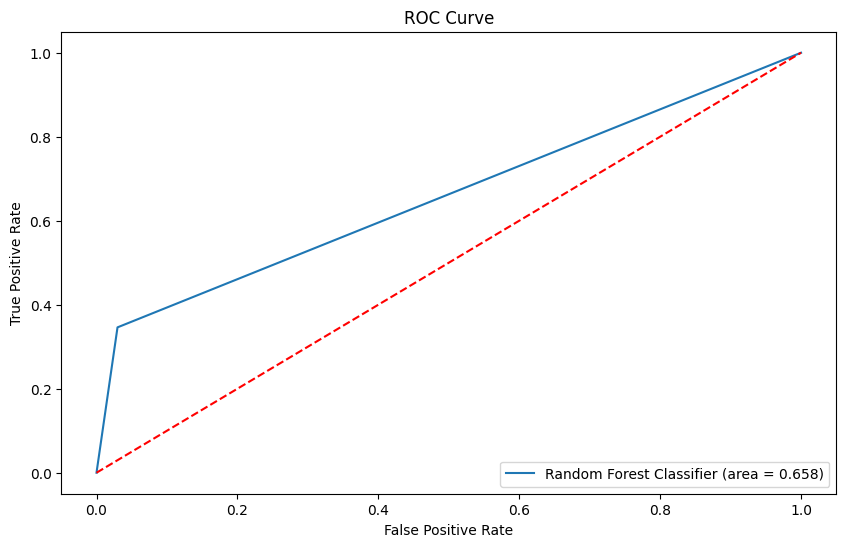

In [39]:
# display ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()